In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
%matplotlib inline

In [2]:
#Reading Input file of Dataset
boston = pd.read_excel("Book1.xls")
boston

# Data Exploration

In [10]:
#Returning top 10 rows of the dataset
boston.head(n=10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,NaN
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,NaN
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,NaN
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [11]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       296 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [12]:
#Counting Null records for the dataset
boston.isnull().sum()

ID          0
crim        0
zn          0
indus       0
chas        0
nox         0
rm          0
age         0
dis         0
rad         0
tax         0
ptratio     0
black       0
lstat       0
medv       37
dtype: int64

In [13]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,296.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.859122
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.665654
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,16.575000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.450000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,26.250000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


# Data Cleaning

In [14]:
#Calculating mean value for the attribute 'medv'
boston['medv'].mean()

22.859121621621632

In [15]:
#Replacing null values with the mean value of 6

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.000000
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,22.859122
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.400000
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.200000
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.859122
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.000000
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.900000
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.700000
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,22.859122
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.200000


In [16]:
plt.figure(figsize=(23,10))

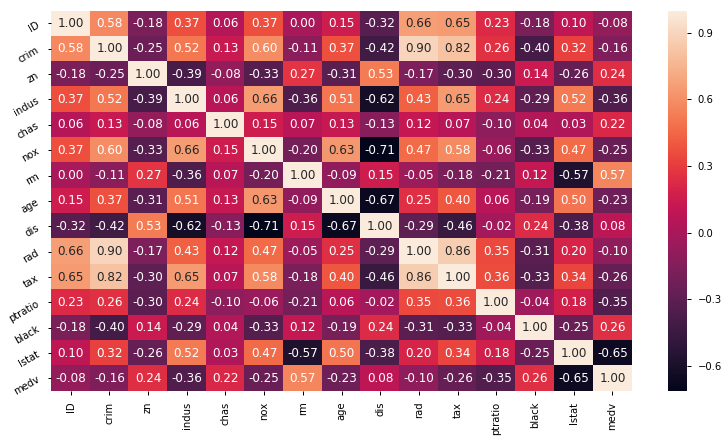

In [50]:
#Correlation and heat map
correlation = boston.corr()
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize=(13, 7))
a = sns.heatmap(correlation,annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Exploratory Data Analysis

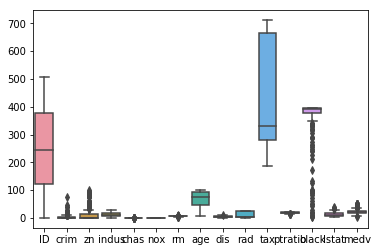

In [17]:
sns.boxplot(data = boston)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AE193160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E0AE64C198>]], dtype=object)

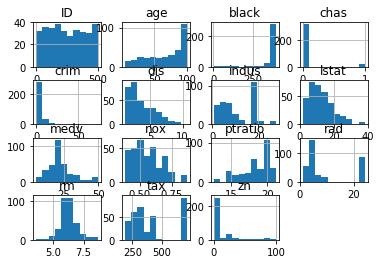

In [18]:
#Creating a histogram
boston.hist()

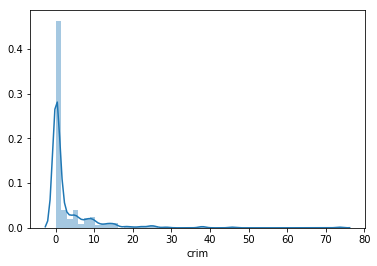

In [19]:
sns.distplot(boston["crim"])

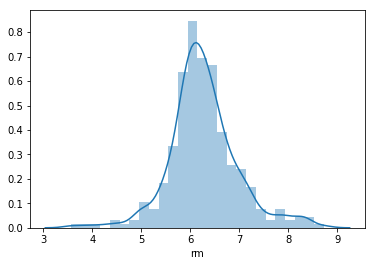

In [20]:
sns.distplot(boston["rm"])

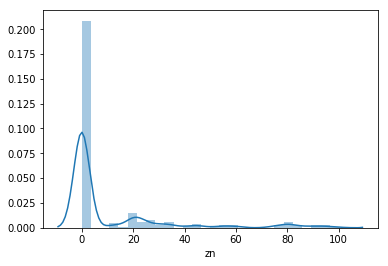

In [21]:
sns.distplot(boston["zn"])

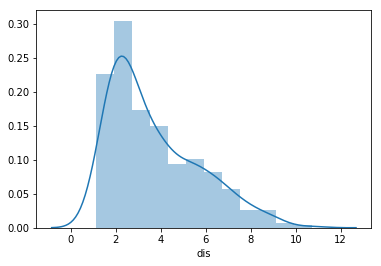

In [22]:
sns.distplot(boston["dis"])

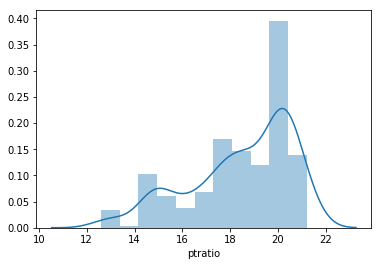

In [23]:
sns.distplot(boston["ptratio"])

Text(0.5,1,'Crime Vs Price')

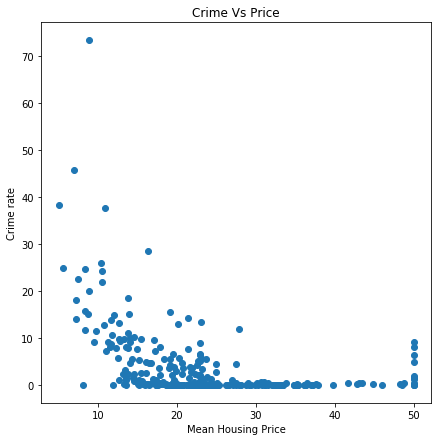

In [24]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='crim',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('Crime rate')
plt.title('Crime Vs Price')

Text(0.5,1,'NOX Vs Price')

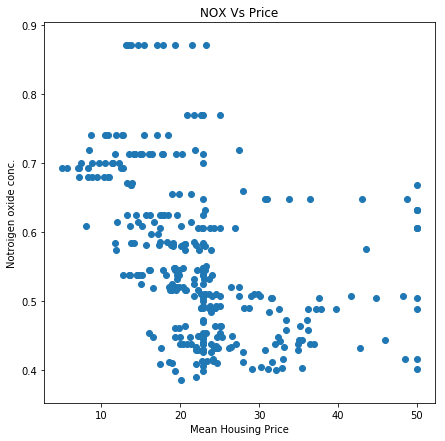

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='nox',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('Notroigen oxide conc.')
plt.title('NOX Vs Price')

Text(0.5,1,'Room Vs Price')

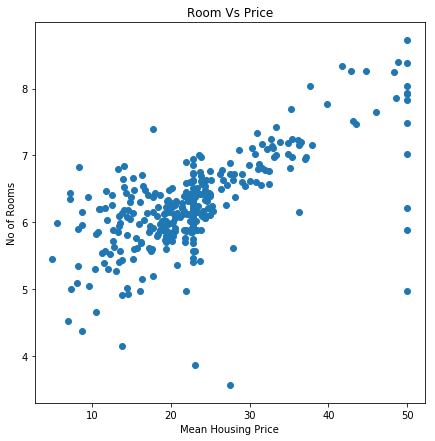

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='rm',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('No of Rooms')
plt.title('Room Vs Price')

Text(0.5,1,'Age Vs Price')

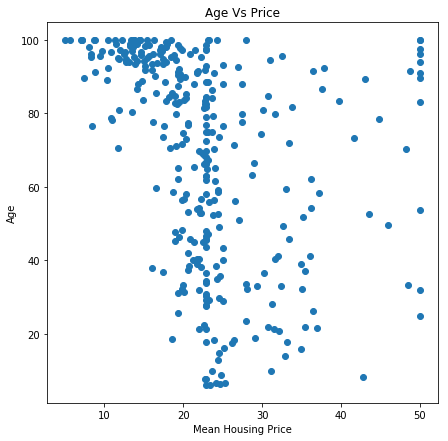

In [27]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='age',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('Age')
plt.title('Age Vs Price')

Text(0.5,1,'Highways Vs Price')

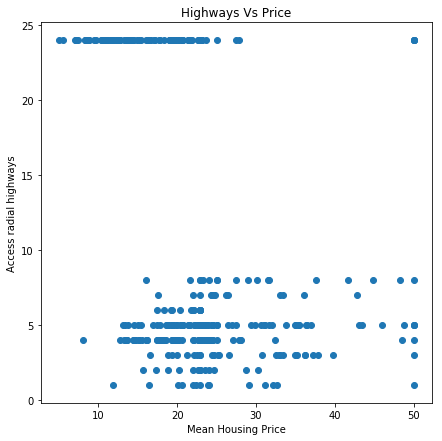

In [28]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='rad',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('Access radial highways')
plt.title('Highways Vs Price')

Text(0.5,1,'Tax Vs Price')

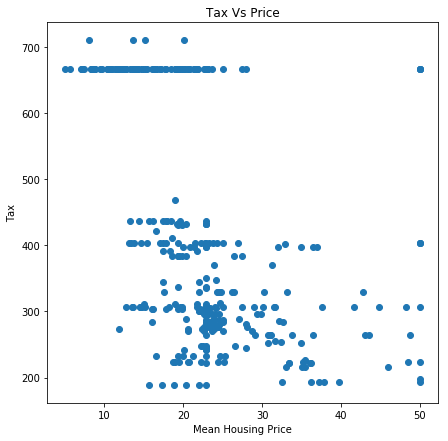

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(x='medv',y='tax',data=boston)
plt.xlabel('Mean Housing Price')
plt.ylabel('Tax')
plt.title('Tax Vs Price')

## By Visualizing and referring above polts we can say that the attributes that affects the model are rm and zn. Along with this we also found lot of outliers in the dataset.

In [30]:
#Removing Outliers

In [ ]:
#dropping outliers from crim column ie removing values above 9.078
boston= boston.drop(boston[boston['crim']>9.078].index)

In [ ]:
#dropping outliers from rm ie removing values above 7.661 and below 4.817

In [31]:
boston = boston.drop(boston[(boston['rm']>7.6615) | (boston['rm']<4.8175)].index)

In [33]:
#dropping outliers from zn column ie removing values above 31.25
boston= boston.drop(boston[boston['zn']>31.25].index)

In [34]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,226.219409,1.455481,3.656118,11.664093,0.067511,0.559383,6.177181,69.587342,3.600529,8.210970,386.092827,18.517722,367.704008,12.295527,22.283433
std,151.330296,2.276731,8.251791,6.781070,0.251435,0.109401,0.489035,26.190232,1.699247,7.781293,158.231192,2.141128,69.821678,5.782277,6.767176
min,1.000000,0.006320,0.000000,1.380000,0.000000,0.409000,4.926000,6.000000,1.129600,1.000000,188.000000,13.000000,3.500000,1.730000,8.100000
25%,101.000000,0.100080,0.000000,5.860000,0.000000,0.488000,5.878000,52.300000,2.305300,4.000000,277.000000,17.400000,377.070000,8.100000,18.600000
50%,184.000000,0.245220,0.000000,9.900000,0.000000,0.538000,6.127000,77.300000,3.099300,5.000000,307.000000,19.000000,392.180000,11.380000,22.200000
75%,339.000000,1.628640,0.000000,18.100000,0.000000,0.609000,6.431000,91.800000,4.502600,7.000000,432.000000,20.200000,396.140000,15.390000,23.900000
max,506.000000,8.982960,30.000000,27.740000,1.000000,0.871000,7.645000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


# Developing Model

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm =LinearRegression()

In [37]:
X = boston.drop('medv',axis=1)
y = boston['medv']

# Split train - test dataset

In [38]:
from sklearn.model_selection import train_test_split

In [46]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predict = lm.predict(X_test)

In [ ]:
# Scatter Plot
plt.scatter(y_test, predict)
plt.xlabel("Prices")
plt.ylabel("predicted prices")
plt.title("prices vs predicted prices")

# Mean Squared Error

In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predict))

In [44]:
rms

4.226642601628974